#ELMo ( Embeddings from Language Model)

사전 훈련된 언어 모델

#등장 배경

Word2Vec, GloVe는 Context를 반영하지 못한다. 즉, Bank Account의 Bank와 River Bank의 Bank는 동일한 embedding vector가 되기 때문에 문맥에 따라 단어를 다르게 임베딩하지 못한다. 따라서, 문맥을 반영한 워드 임베딩(Contextualized Word Embedding)이 필요하다. 이를 구현하는 것이 바로 ELMo이다.

#ELMo

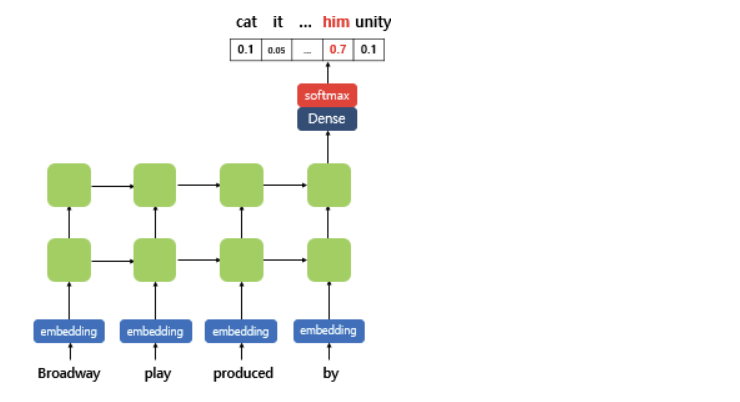

RNN 기반 언어 모델을 문장으로부터 단어 단위로 입력을 받는데 이때, RNN 내부의 Weight는 학습이 될수록 update된다. 이는 결과적으로 문장의 문맥 정보를 점차적으로 반영한다고 이해할 수 있다. 하지만 ELMo는 이런 순방향 RNN에 더해 역방향 RNN도 활용한다. 양쪽 방향의 언어 모델을 둘 다 학습하여 Context를 이해할 수 있게 되는 것이다.

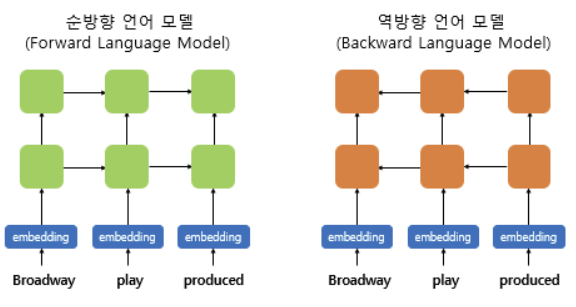

ELMo에서 말하는 biLM은 다층 구조를 전제로 하며, 은닉층이 최소 2개 이상이다. 이때, 입력 데이터는 임베딩 layer를 이용한 임베딩 벡터가 아니라 CNN을 이용하여 얻은 문자 임베딩 단어 벡터이다. 이런 문자 임베딩은 subword를 참고할 수 있어 FastText처럼 OOV(Out of Vocabulary)에 강하다.

ELMo는 양방향 RNN과 달리 정방향, 역방향 모델을 따로 분리해서 학습하는 것이다.

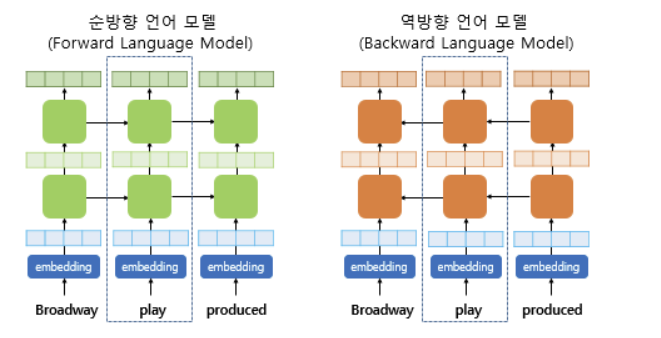

이 그림에서 play 단어가 임베딩이 되고 있다고 하자. play는 box된 timestep의 BiLM의 각 층의 출력값을 가져온다. 그리고 두 언어 모델의 각 층의 출력값을 연결한다.

즉, ELMo의 직관적인 아이디어는 각 층의 출력값이 가진 정보는 서로 다른 모델로부터 나온 정보이므로 서로 다른 정보를 가졌을 것이라고 가정하고 이들을 모두 활용하여 문맥을 고려한 embedding vector를 얻는다는 것이다.

이 때, 출력값이란 첫번째는 embedding 층, 나머지는 각 층의 hidden state output을 의미한다.

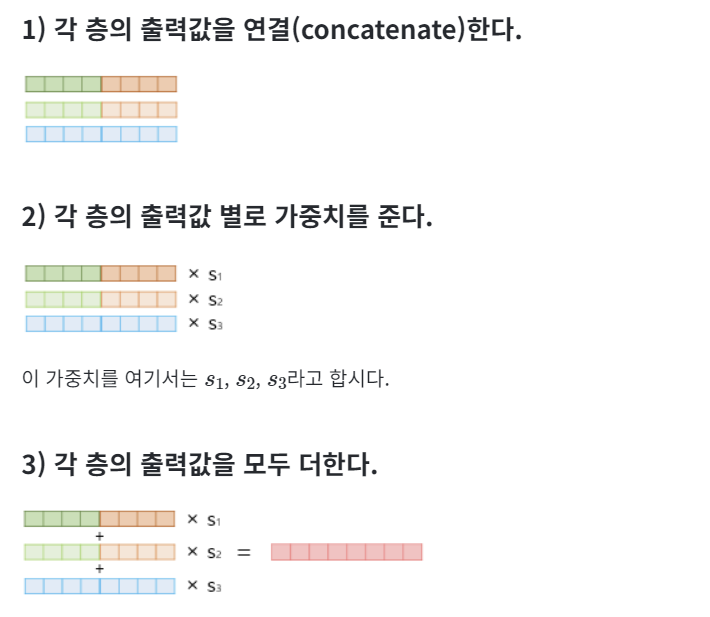

여기서 가중치를 s1, s2, s3라고 하자. 즉, 각 출력값의 Weighted Sum을 구한다고 할 수 있다.

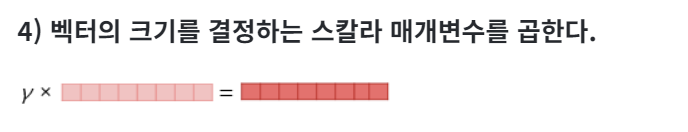

이 스칼라 매개변수를 r이라고 하자.

이 과정을 통해 ELMo 표현을 얻는 것이다.




#ELMo 표현을 NLP task에 어떻게 사용할 수 있을까

ELMo 표현을 기존의 임베딩 벡터와 함께 사용할 수 있다. 예를 들어, text classification을 한다고 할 때, 기존에 얻은 임베딩 벡터와 ELMo 표현 벡터를 연결해서 입력으로 사용하는 것이다. 이때, biLM의 가중치는 고정시키고, s1, s2, s3, r은 hyper parameter로 훈련 과정에서 학습하는 것이다.


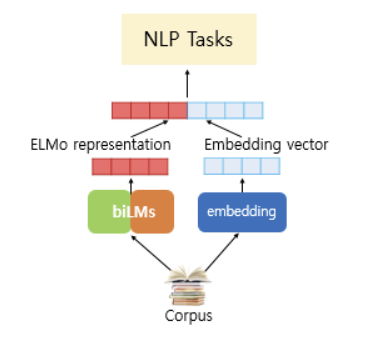